In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.base import TransformerMixin,BaseEstimator
from sklearn import metrics
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor 
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor


In [2]:
# reading the data & some statistical methods (Require1):

data=pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
# extract objected features columns :
data.select_dtypes("object").columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [7]:
# extract numerical columns:
data.select_dtypes("number").columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [8]:
#  extract discreate features(int64):
data.select_dtypes(include=["int64"]).columns

Index(['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch'], dtype='object')

In [9]:
# extract continous features(float64):
data.select_dtypes(include=["float64"]).columns

Index(['Age', 'Fare'], dtype='object')

In [10]:
#check the missing values:
data.isna().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [11]:
# to know number of pepole survived , die :

data["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [12]:
# to know number of brothers passengers:

data["SibSp"].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [13]:
# extract range of Ages:

data["Age"].value_counts().rank().head(20)

Age
24.0    88.0
22.0    87.0
18.0    86.0
19.0    84.0
28.0    84.0
30.0    84.0
21.0    82.0
25.0    81.0
36.0    80.0
29.0    79.0
32.0    76.5
35.0    76.5
27.0    76.5
26.0    76.5
16.0    73.5
31.0    73.5
20.0    70.5
34.0    70.5
33.0    70.5
23.0    70.5
Name: count, dtype: float64

In [14]:
#unique odf data:

data.describe(include=["O"]).T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


In [15]:
# to extract number of males and females:

data["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [16]:
# whats of majourity cabines?

data["Cabin"].value_counts().rank().head(25)

Cabin
B96 B98        146.0
G6             146.0
C23 C25 C27    146.0
C22 C26        142.0
F33            142.0
F2             142.0
E101           142.0
D              142.0
C78            120.5
C93            120.5
E8             120.5
D36            120.5
B77            120.5
C123           120.5
E121           120.5
E44            120.5
D35            120.5
C125           120.5
E67            120.5
B35            120.5
B18            120.5
E24            120.5
B49            120.5
C65            120.5
B20            120.5
Name: count, dtype: float64

In [17]:
data["SibSp"].describe().T

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

<Axes: xlabel='Pclass'>

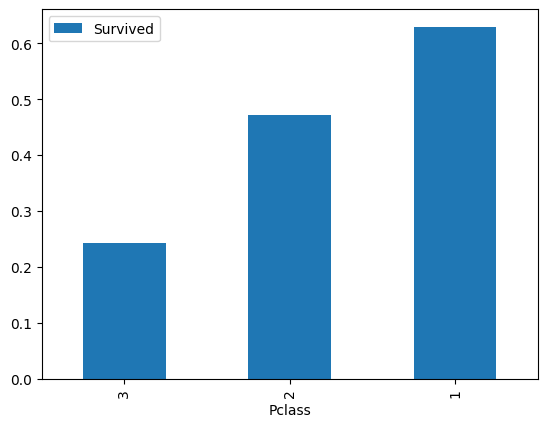

In [18]:
# some important plots : (Require 2)

data.groupby(["Pclass"])["Survived"].mean().sort_values(ascending=True).plot(kind="bar",legend=True)

<Axes: xlabel='SibSp'>

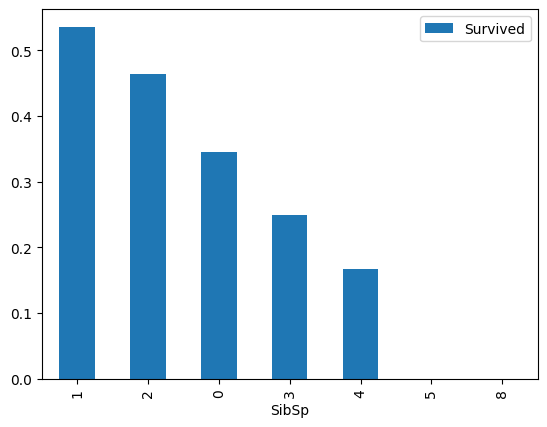

In [19]:
data.groupby(["SibSp"])["Survived"].mean().sort_values(ascending=False).plot(kind="bar",legend=True)

Survived
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
Name: Age, dtype: object

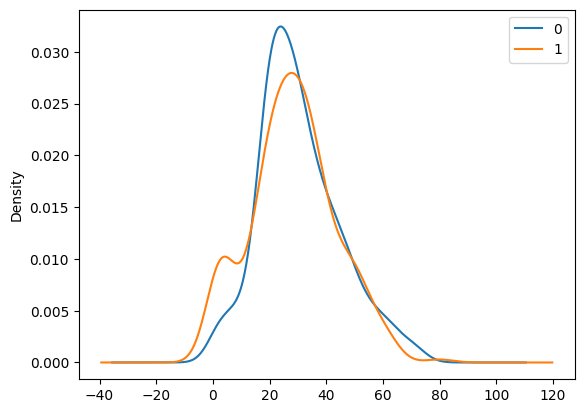

In [20]:
data.groupby(["Survived"])["Age"].plot(kind="kde",legend=True)

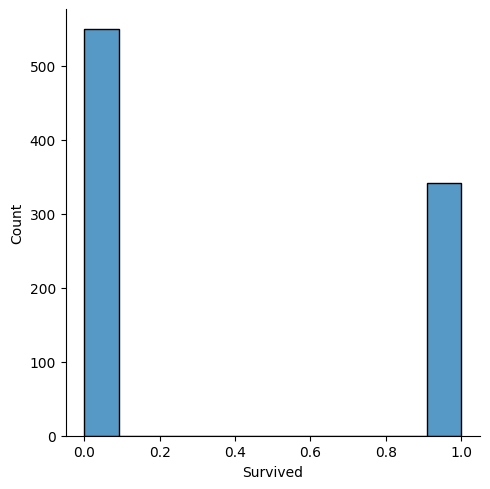

In [21]:
sns.displot(data["Survived"])

<Axes: xlabel='Age', ylabel='Density'>

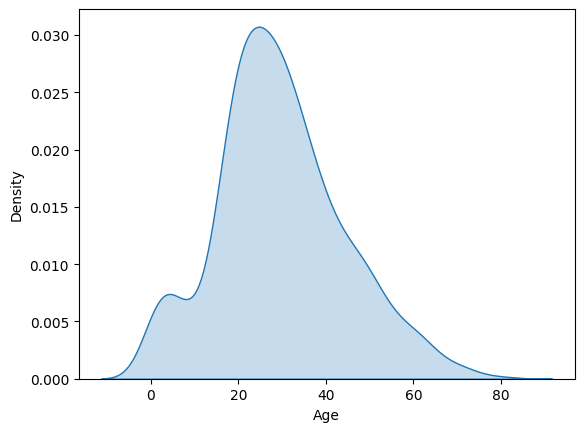

In [22]:
sns.kdeplot(data["Age"],fill=True)

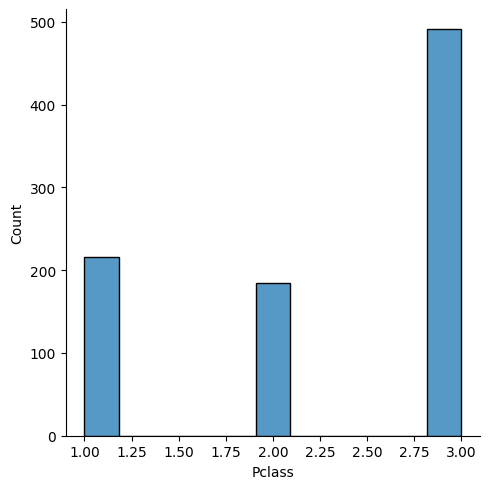

In [23]:
sns.displot(data["Pclass"])

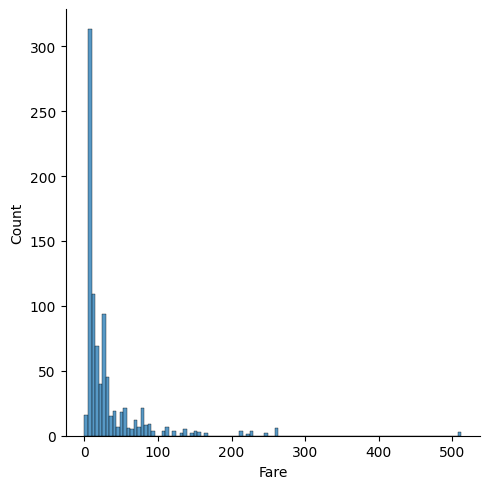

In [24]:
sns.displot(data["Fare"])

<Axes: >

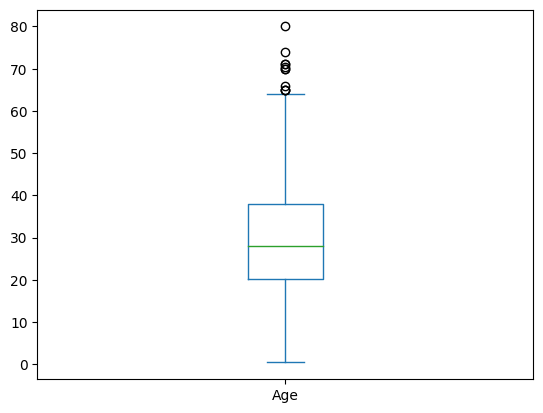

In [25]:
data["Age"].plot(kind="box")

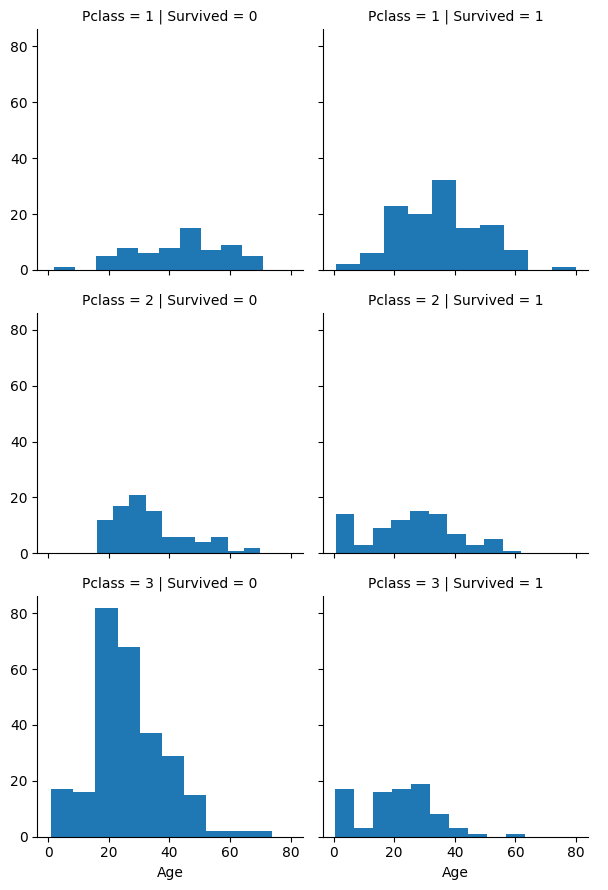

In [26]:
# How Pclass with Age effect on survived passengers:

grid=sns.FacetGrid(data,col="Survived",row="Pclass")
grid.map(plt.hist,"Age")
grid.add_legend()

/home/abdalrahman/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/abdalrahman/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/abdalrahman/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/abdalrahman/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/abdalrahman/.local/lib/python3.8/s

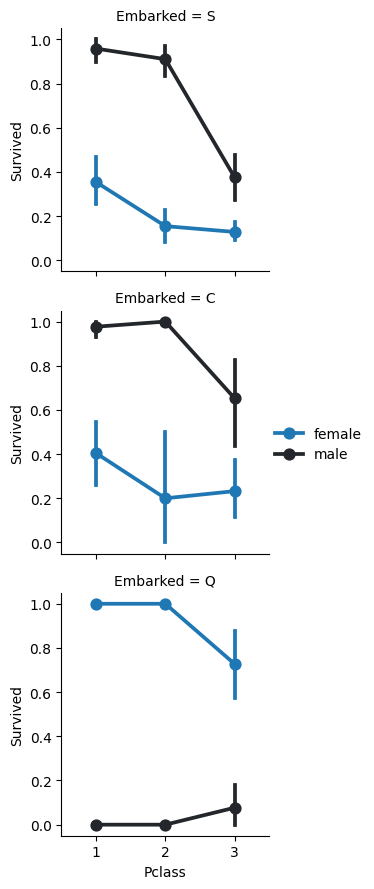

In [27]:
# How sex with Embarked effect on survived passengers:

grid=sns.FacetGrid(data,row="Embarked")
grid.map(sns.pointplot,"Pclass","Survived","Sex")
grid.add_legend()

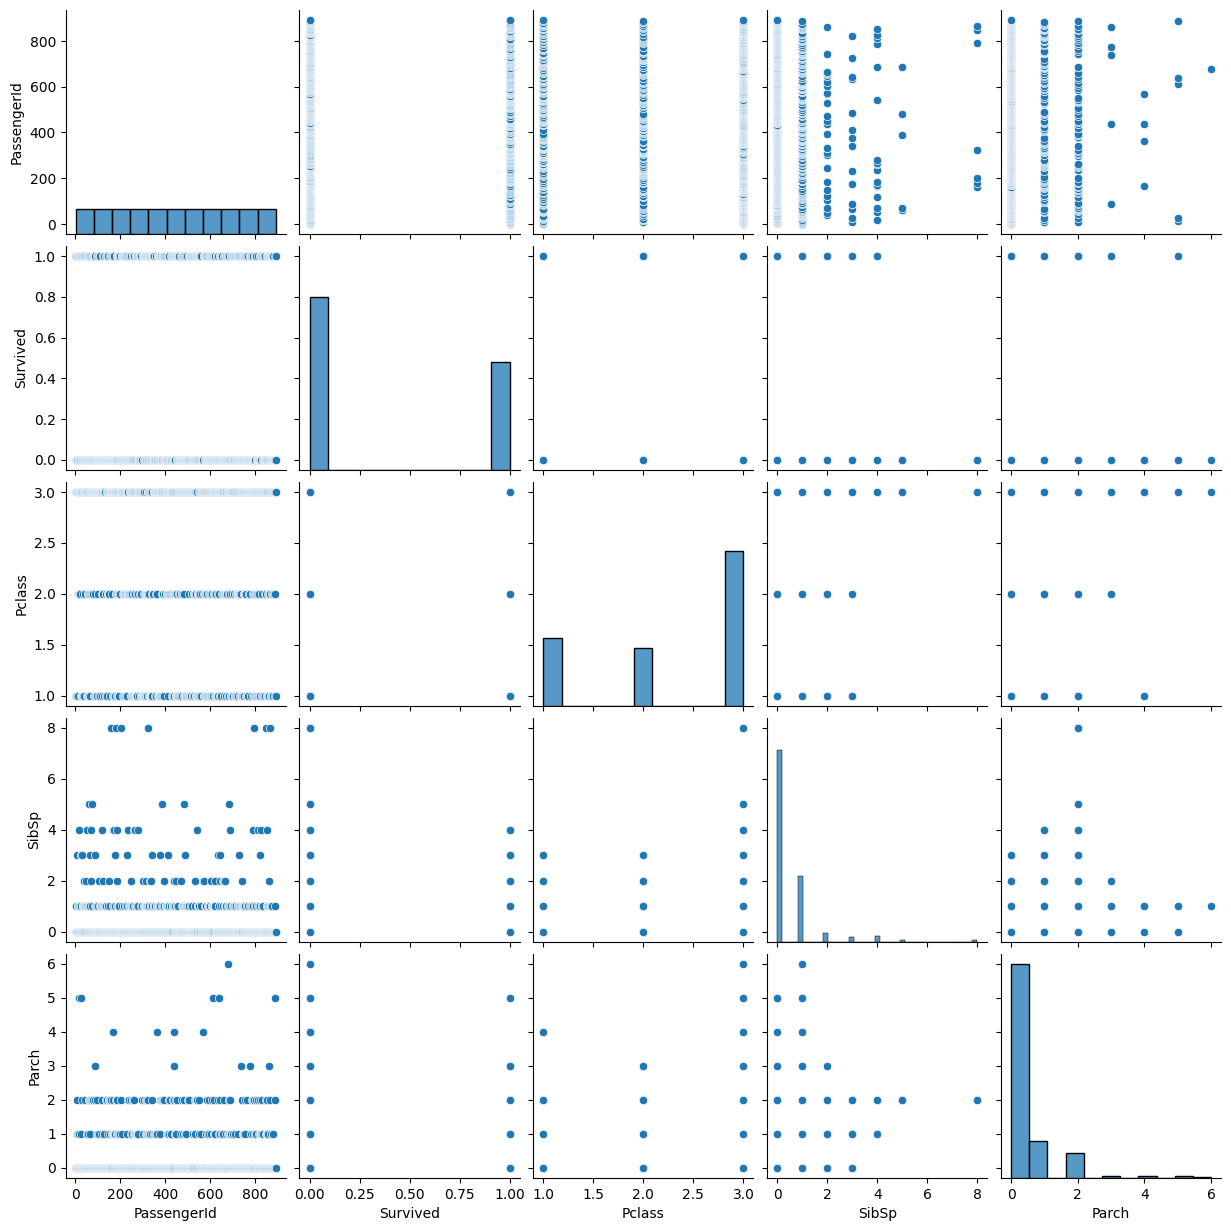

In [28]:
# to plot random pairplot for discrete data:

sns.pairplot(data.select_dtypes(include=["int64"]))

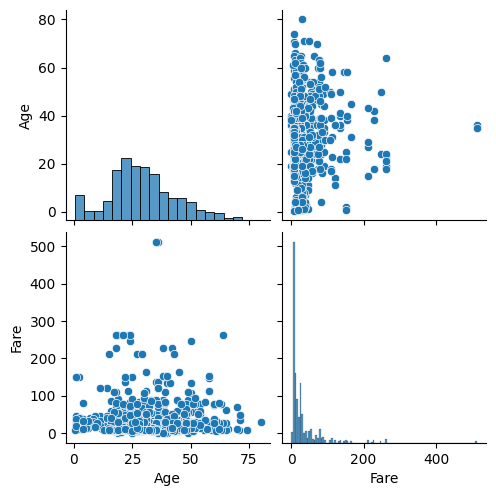

In [29]:
# to plot random pairplot for continous data:
sns.pairplot(data.select_dtypes(include=["float64"]))

In [30]:
# Handle the missing value : Require(3)
#1-by using pandas(mean,mode,median,linearimpution) :
#2-by using Simpleimputer from sklearn:

data.isna().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [31]:
# as Cabin contain on 77% from nan values then we drop it if not important:

data=data.drop(columns="Cabin")
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [32]:
data["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [33]:
# As the Embarked column that contain the categorical data then we will fillina it by using mode()]
# as there is median in the Age we use the median:

data =data.fillna({
 "Embarked":data['Embarked'].mode()[0]})


In [34]:
data=data.dropna(subset=["Age"])


In [35]:
# see if threre null values after handling the missing values:
data.isna().mean()

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [36]:
# Simple imputer from sklearn to handle the missing values:

from sklearn.impute import SimpleImputer

imputer=SimpleImputer(strategy="median")
imputer.fit(data["Age"].values.reshape(1,-1))
imputer.transform(data["Age"].values.reshape(1,-1))

array([[22.  , 38.  , 26.  , 35.  , 35.  , 54.  ,  2.  , 27.  , 14.  ,
         4.  , 58.  , 20.  , 39.  , 14.  , 55.  ,  2.  , 31.  , 35.  ,
        34.  , 15.  , 28.  ,  8.  , 38.  , 19.  , 40.  , 66.  , 28.  ,
        42.  , 21.  , 18.  , 14.  , 40.  , 27.  ,  3.  , 19.  , 18.  ,
         7.  , 21.  , 49.  , 29.  , 65.  , 21.  , 28.5 ,  5.  , 11.  ,
        22.  , 38.  , 45.  ,  4.  , 29.  , 19.  , 17.  , 26.  , 32.  ,
        16.  , 21.  , 26.  , 32.  , 25.  ,  0.83, 30.  , 22.  , 29.  ,
        28.  , 17.  , 33.  , 16.  , 23.  , 24.  , 29.  , 20.  , 46.  ,
        26.  , 59.  , 71.  , 23.  , 34.  , 34.  , 28.  , 21.  , 33.  ,
        37.  , 28.  , 21.  , 38.  , 47.  , 14.5 , 22.  , 20.  , 17.  ,
        21.  , 70.5 , 29.  , 24.  ,  2.  , 21.  , 32.5 , 32.5 , 54.  ,
        12.  , 24.  , 45.  , 33.  , 20.  , 47.  , 29.  , 25.  , 23.  ,
        19.  , 37.  , 16.  , 24.  , 22.  , 24.  , 19.  , 18.  , 19.  ,
        27.  ,  9.  , 36.5 , 42.  , 51.  , 22.  , 55.5 , 40.5 , 51.  ,
      

In [37]:
# detect the outlier:
data.describe()

# by comparing mean and 50% quantile for Age & Fare we found that there is outlier 





,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,259.119524,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


<Axes: xlabel='Age'>

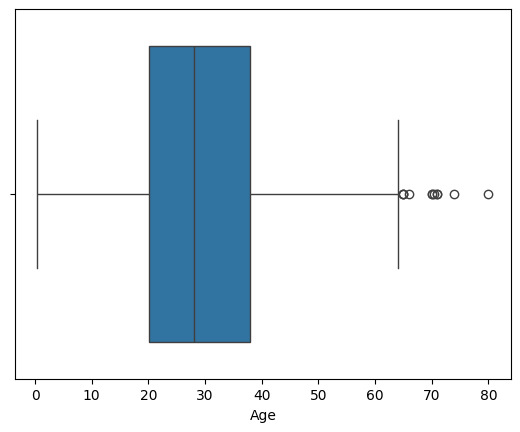

In [38]:
# we use the boxplot & scatterolot to detect the outlier:

sns.boxplot(x=data["Age"])


<Axes: xlabel='Age'>

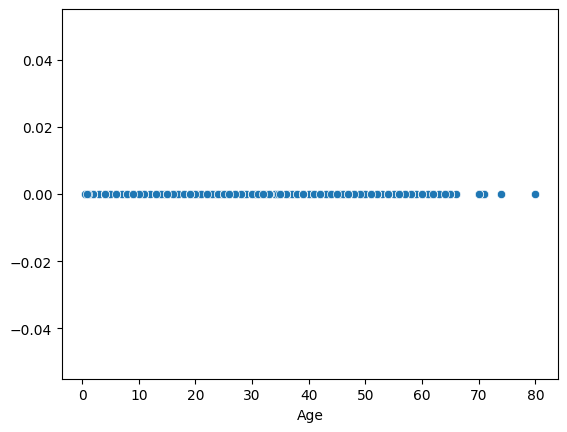

In [39]:
sns.scatterplot(x=data["Age"],y=np.zeros_like(data["Age"]))

<Axes: xlabel='Fare'>

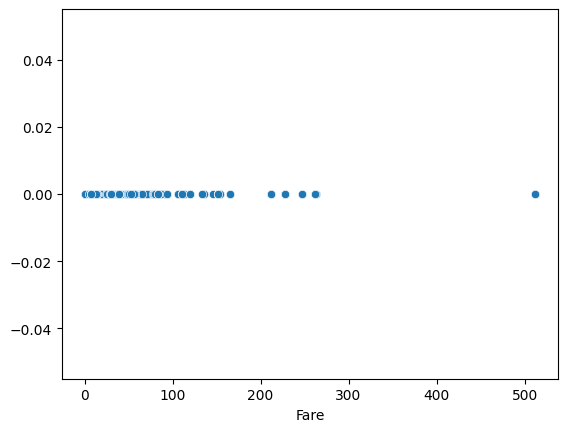

In [40]:
# scatter plot & boxplot for Fare column to detect the outlier:

sns.scatterplot(x=data["Fare"],y=np.zeros_like(data["Fare"]))

<Axes: xlabel='Fare'>

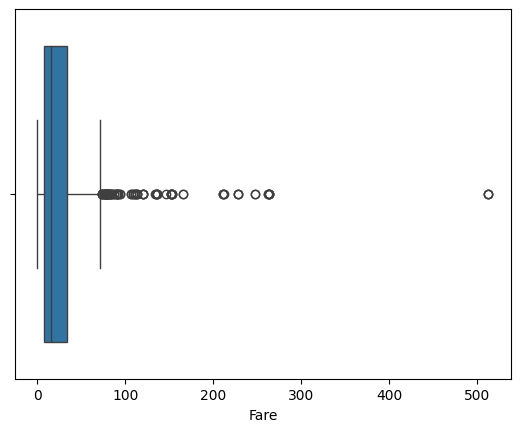

In [41]:
sns.boxplot(x=data["Fare"])

In [42]:
# calc the outlier for Age:

for col in data.columns:
   Q1_Age,Q3_Age=data["Age"].quantile([0.25,0.75])
   IQR_Age=Q3_Age-Q1_Age

print('Q1_Age=',Q1_Age)
print("Q3_AGE=",Q3_Age)
print("IQR_Age=",IQR_Age)

low_lim_Age=Q1_Age-1.5*IQR_Age
upper_lim_Age=Q3_Age+1.5*IQR_Age
outlier_Age =[] 

print("outlier=",outlier_Age)
print("low_lim_Age=",low_lim_Age)
print("upper_lim_Age=",upper_lim_Age)

for x in data["Age"]: 
    if ((x> upper_lim_Age) or (x<low_lim_Age)): 
         outlier_Age.append(x)

Q1_Age= 20.125
Q3_AGE= 38.0
IQR_Age= 17.875
outlier= []
low_lim_Age= -6.6875
upper_lim_Age= 64.8125


In [43]:
len(outlier_Age)

11

In [44]:
print(outlier_Age)

[66.0, 65.0, 71.0, 70.5, 65.0, 65.0, 71.0, 80.0, 70.0, 70.0, 74.0]


upper_limit :  73.27860964406094
lower_limit :  -13.880374349943303
Mean Value :  29.69911764705882
1st Standard Deviation :  14.526497332334042


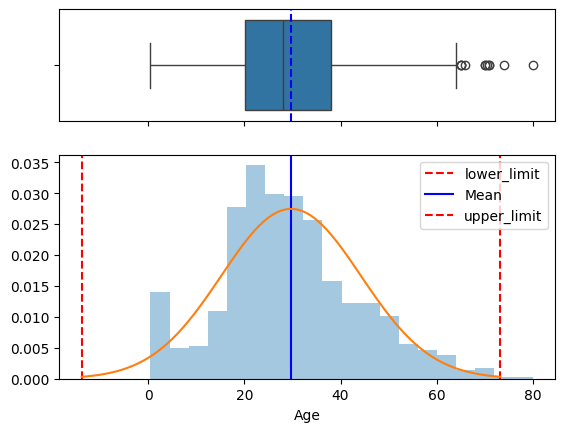

In [45]:
#Another way to calculate outlier:-


from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 1)})

mean=data.Age.mean()
std = data.Age.std()
median = data.Age.median()
upper_limit = mean + std*3
lower_limit = mean - std*3
print("upper_limit : ", upper_limit)
print("lower_limit : ",lower_limit)

sns.boxplot(x=data["Age"], ax=ax_box)
ax_box.axvline(mean, color='b', linestyle='--')


sns.distplot(data["Age"], ax=ax_hist,kde=False,norm_hist=True)
ax_hist.axvline(lower_limit, color='r', linestyle='--')
ax_hist.axvline(mean, color='b', linestyle='-')
ax_hist.axvline(upper_limit, color='r', linestyle='--')



plt.legend({'Mean':mean})

ax_box.set(xlabel='')

x = np.linspace(mean - 3*std, mean + 3*std, 100)
plt.plot(x, norm.pdf(x, mean, std))
plt.legend({"lower_limit":lower_limit,'Mean':mean,'upper_limit':upper_limit})
print("Mean Value : ",mean)
#print("Median Value : ",median)
print("1st Standard Deviation : ",std)

plt.show()

In [46]:
#Calc the Variance Thershold & correlation   :

data["passengers"]=data["SibSp"]+data["Parch"]
data.head(35)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,passengers
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S,2


In [47]:
num_col=data.select_dtypes("number").columns
num_col

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'passengers'],
      dtype='object')

In [48]:
selector=VarianceThreshold(threshold=0.01)
selector.fit(data.select_dtypes("number"))
selector.get_support(indices=True)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [49]:
# to show the names of features :

num_col[selector.get_support(indices=True)]

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'passengers'],
      dtype='object')

In [50]:
data.describe(include=["O"]).T

,count,unique,top,freq
Name,714,714,"Braund, Mr. Owen Harris",1
Sex,714,2,male,453
Ticket,714,542,347082,7
Embarked,714,3,S,556


In [43]:
# create transformer to remove high and low cardinality categorical or (low-high) varience:


from sklearn.base import BaseEstimator , TransformerMixin

class Var_Selector(BaseEstimator,TransformerMixin):
    
    def __init__(self,num_cols):
        self.num_cols=None
    def fit(self,data):
        self.num_cols=data.select_dtypes("number").columns
        return self
    def transform(self,data):
        selector=VarianceThreshold(threshold=0.01)
        selector.fit(data[self.num_cols])
        
        removed_cols=[column for column in self.num_cols if column not in \
                     self.num_cols[selector.get_support(indices=True)]]
        data=data.drop(columns=removed_cols)
        
        # remove high-low cardinality categorical:-
        
        removed_cols=data.nunique()[((data.nunique()==1)|data.nunique()==len(data))].index
        
        return data.drop(columns=removed_cols)
        

In [44]:
data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S


In [45]:
transform=Var_Selector(data)
transform.fit(data)
transform.transform(data)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [46]:
# removed the duplicate features :

df=data.T
duplicate_feature=df.duplicated().sum()
duplicate_feature

0

In [47]:
data.drop_duplicates()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [48]:
# Calculate the correlation with different methods :-

# 1- using pandas :

data.select_dtypes("number").corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.029340,-0.035349,0.036847,-0.082398,-0.011617,0.009592
Survived,0.029340,1.000000,-0.359653,-0.077221,-0.017358,0.093317,0.268189
Pclass,-0.035349,-0.359653,1.000000,-0.369226,0.067247,0.025683,-0.554182
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.082398,-0.017358,0.067247,-0.308247,1.000000,0.383820,0.138329
Parch,-0.011617,0.093317,0.025683,-0.189119,0.383820,1.000000,0.205119
Fare,0.009592,0.268189,-0.554182,0.096067,0.138329,0.205119,1.000000


In [49]:
# 2- using pearson :
data.select_dtypes("number").corr(method="pearson")

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.029340,-0.035349,0.036847,-0.082398,-0.011617,0.009592
Survived,0.029340,1.000000,-0.359653,-0.077221,-0.017358,0.093317,0.268189
Pclass,-0.035349,-0.359653,1.000000,-0.369226,0.067247,0.025683,-0.554182
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.082398,-0.017358,0.067247,-0.308247,1.000000,0.383820,0.138329
Parch,-0.011617,0.093317,0.025683,-0.189119,0.383820,1.000000,0.205119
Fare,0.009592,0.268189,-0.554182,0.096067,0.138329,0.205119,1.000000


In [50]:
# 3- usng spearman:

data.select_dtypes("number").corr(method="spearman")

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.029720,-0.034418,0.041010,-0.065982,-0.005410,-0.020341
Survived,0.029720,1.000000,-0.360656,-0.052565,0.073244,0.156444,0.339027
Pclass,-0.034418,-0.360656,1.000000,-0.361666,-0.050959,-0.018489,-0.730578
Age,0.041010,-0.052565,-0.361666,1.000000,-0.182061,-0.254212,0.135051
SibSp,-0.065982,0.073244,-0.050959,-0.182061,1.000000,0.426955,0.422994
Parch,-0.005410,0.156444,-0.018489,-0.254212,0.426955,1.000000,0.407150
Fare,-0.020341,0.339027,-0.730578,0.135051,0.422994,0.407150,1.000000


In [51]:
# 3- usng kendell:

data.select_dtypes("number").corr(method="kendall")

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.024283,-0.027132,0.027542,-0.051892,-0.004431,-0.013296
Survived,0.024283,1.000000,-0.342105,-0.043385,0.070775,0.150952,0.278785
Pclass,-0.027132,-0.342105,1.000000,-0.286081,-0.046724,-0.016988,-0.611963
Age,0.027542,-0.043385,-0.286081,1.000000,-0.142746,-0.200112,0.093249
SibSp,-0.051892,0.070775,-0.046724,-0.142746,1.000000,0.401108,0.336681
Parch,-0.004431,0.150952,-0.016988,-0.200112,0.401108,1.000000,0.326439
Fare,-0.013296,0.278785,-0.611963,0.093249,0.336681,0.326439,1.000000


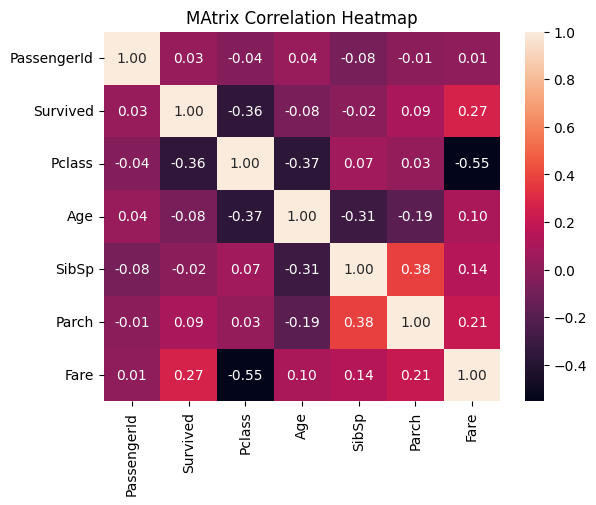

In [52]:
# plot of heatmap correlation :

sns.heatmap(data.select_dtypes("number").corr(),annot=True,fmt="0.2f")
plt.title("MAtrix Correlation Heatmap")
plt.show()

In [53]:
#select the most 5 features correlation (Require4):

from sklearn.feature_selection import f_classif, SelectKBest

fs=SelectKBest(score_func=f_classif,k=5)
fs.fit(data.drop(columns="Age").select_dtypes("number").fillna(0),data["Age"])

SelectKBest(k=5)

In [54]:
print(["{:10f}".format(p) for p in fs.pvalues_])

['  0.030820', '  0.089048', '  0.000000', '  0.000000', '  0.000000', '  0.754387']


In [55]:
print(["{:10f}".format(p) for p in fs.scores_])

['  1.330708', '  1.228912', '  2.396525', '  3.363287', '  2.575085', '  0.886992']


In [56]:
features_pvalues=pd.DataFrame(fs.pvalues_)
fatures_scores=pd.DataFrame(fs.scores_)
features=pd.DataFrame(data.drop(columns="Age").select_dtypes("number").fillna(0).columns)

In [57]:
feature_score=pd.concat([features_pvalues,fatures_scores,features],axis=1)
feature_score.columns=["pvalues","score","input"]
feature_score

,pvalues,score,input
0,3.081990e-02,1.330708,PassengerId
1,8.904782e-02,1.228912,Survived
2,7.403295e-10,2.396525,Pclass
3,1.675083e-18,3.363287,SibSp
4,2.133242e-11,2.575085,Parch
5,7.543868e-01,0.886992,Fare


In [58]:
# Decesion Tree (Require5):-

# drop the not important columns:

data=data.drop(columns=["Name","Ticket"])
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [59]:
# using the dummies to transform:

data=pd.get_dummies(data)
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,2,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,3,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,4,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,5,0,3,35.0,0,0,8.0500,False,True,False,False,True


In [62]:
# Divivide the data to x,y:

from sklearn.model_selection import train_test_split

x=data.drop("Age",axis=1)
y=data["Age"]

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=23)
print(np.shape(X_train),np.shape(X_test),np.shape(y_train),np.shape(y_test))

(499, 11) (215, 11) (499,) (215,)


In [63]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) 

#Parameter
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = data.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Sklearn_theta
0,1,0,3,22.0,1,0,7.2500,False,True,False,False,True,52.551805
1,2,1,1,38.0,1,0,71.2833,True,False,True,False,False,-0.001500
2,3,1,3,26.0,0,0,7.9250,True,False,False,False,True,-7.094336
3,4,1,1,35.0,1,0,53.1000,True,False,False,False,True,-7.453621
4,5,0,3,35.0,0,0,8.0500,False,True,False,False,True,-4.063771
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,39.0,0,5,29.1250,True,False,False,True,False,NaN
886,887,0,2,27.0,0,0,13.0000,False,True,False,False,True,NaN
887,888,1,1,19.0,0,0,30.0000,True,False,False,False,True,NaN
889,890,1,1,26.0,0,0,30.0000,False,True,True,False,False,NaN


In [71]:
# sklearn regression module
y_pred_sk = lin_reg.predict(X_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = lin_reg.score(X_test,y_test)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)

The Mean Square Error(MSE) or J(theta) is:  184.8956260730055
R square obtain for scikit learn library is : 0.19073524492597826


In [103]:
tree = DecisionTreeRegressor(max_depth=7,max_features=6)
tree.fit(X_train,y_train) 
predictions = tree.predict(X_test)
x_pred=tree.predict(X_train)
df=pd.DataFrame({'Actual':y_test, 'Predicted':predictions})
df.head(5) 

,Actual,Predicted
197,42.0,16.190476
714,52.0,34.515873
83,28.0,49.884615
33,66.0,34.515873
191,19.0,34.515873


In [104]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('r2_score:', metrics.r2_score(y_test,predictions))

Mean Absolute Error: 10.814017851657386
Mean Squared Error: 203.6229309675248
Root Mean Squared Error: 14.26965069535778
r2_score: 0.10876820151589961


In [105]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('r2_score:', metrics.r2_score(y_train,x_pred))

Mean Absolute Error: 10.814017851657386
Mean Squared Error: 203.6229309675248
Root Mean Squared Error: 14.26965069535778
r2_score: 0.620825862601694


In [76]:
tree.feature_importances_
pd.Series(tree.feature_importances_,index=x.columns).sort_values(ascending=False)

SibSp          0.764742
Fare           0.132076
PassengerId    0.071707
Pclass         0.030710
Sex_female     0.000765
Survived       0.000000
Parch          0.000000
Sex_male       0.000000
Embarked_C     0.000000
Embarked_Q     0.000000
Embarked_S     0.000000
dtype: float64

In [77]:
from sklearn.tree import export_graphviz

In [82]:
! pip install graphviz

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [83]:
import graphviz

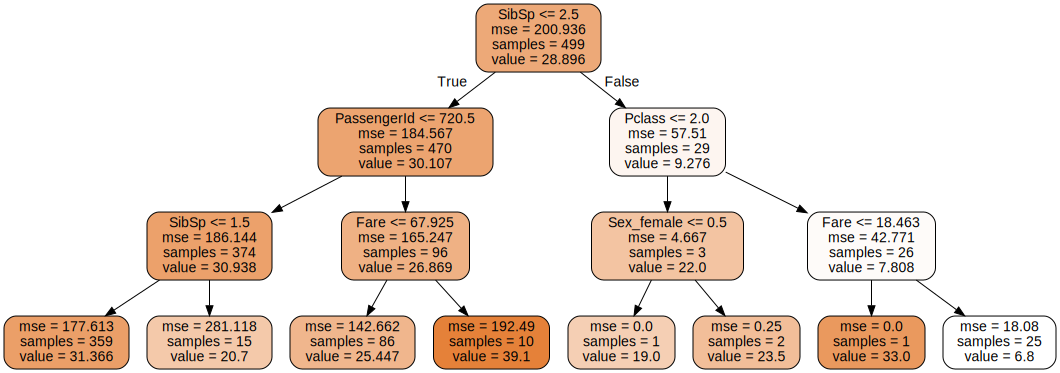

In [85]:
dot_data = export_graphviz(tree, filled=True, rounded=True, feature_names=x.columns, out_file=None)
graphviz.Source(dot_data)

In [125]:
RF=RandomForestRegressor(random_state=42,n_estimators=1000,max_depth=5)
RF.fit(X_train,y_train) 
pred = RF.predict(X_test)
x_pred=RF.predict(X_train)
df=pd.DataFrame({'Actual':y_test, 'Predicted':predictions})
df.head(5) 

,Actual,Predicted
197,42.0,16.190476
714,52.0,34.515873
83,28.0,49.884615
33,66.0,34.515873
191,19.0,34.515873


In [126]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,pred)))
print('r2_score:', metrics.r2_score(y_test,pred))

Mean Absolute Error: 10.435414122746906
Mean Squared Error: 179.656270605056
Root Mean Squared Error: 13.403591705399563
r2_score: 0.21366724072041499


In [127]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train,x_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train,x_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train,x_pred)))
print('r2_score:', metrics.r2_score(y_train,x_pred))

Mean Absolute Error: 7.579500587126589
Mean Squared Error: 92.13872238065166
Root Mean Squared Error: 9.598891726686558
r2_score: 0.5414530924098715


In [131]:
gridsearch = GridSearchCV(estimator=GradientBoostingRegressor(),
                          param_grid={
                              'n_estimators': [50, 100, 250, 300],
                              'max_depth': [None, 100, 200, 300, 400]
                          },
                          cv=3,
                          return_train_score=False,
                          scoring='r2')
gridsearch.fit(X=X_train, y=y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [None, 100, 200, 300, 400],
                         'n_estimators': [50, 100, 250, 300]},
             scoring='r2')

In [132]:
gridsearch.best_estimator_

GradientBoostingRegressor(max_depth=None, n_estimators=50)

In [135]:
x_predict=gridsearch.predict(X_test)
predic=gridsearch.predict(X_train)

In [137]:
print('r2_score:', metrics.r2_score(y_test,x_predict))
print('r2_score:', metrics.r2_score(y_train,predic))

r2_score: -0.23525480627502215
r2_score: 0.9999734386011124


In [153]:
GPR=GradientBoostingRegressor(max_depth=5,n_estimators=250)
GPR.fit(X=X_train, y=y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=250)

In [154]:
predictior=GPR.predict(X_test)
y_predict=GPR.predict(X_train)

In [155]:
print('r2_score:', metrics.r2_score(y_test,predictior))
print('r2_score:', metrics.r2_score(y_train,y_predict))

r2_score: 0.05842811240610857
r2_score: 0.9826303835060455
